In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

In [3]:
import h5py
import numpy as np

def load_happy_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    test_dataset = h5py.File('test_happy.h5', "r")

    X_train_orig = np.array(train_dataset["train_set_x"][:]) # features
    Y_train_orig = np.array(train_dataset["train_set_y"][:]) # labels

    X_test_orig = np.array(test_dataset["test_set_x"][:])    # features
    Y_test_orig = np.array(test_dataset["test_set_y"][:])    # labels

    # reshape labels to row vectors
    Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
    Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

    classes = np.array(test_dataset["list_classes"][:])      # class labels (if available)

    return X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes


In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


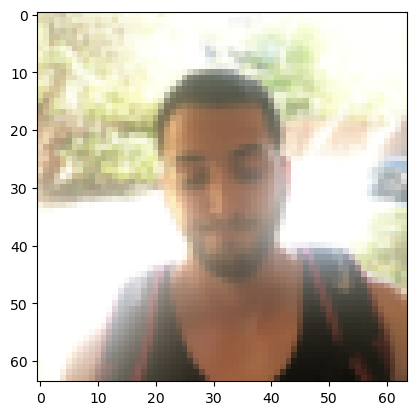

In [5]:
index = 124
plt.imshow(X_train_orig[index])
plt.show()

In [6]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
        
        tf.keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),   # ZeroPadding2D with padding 3, input shape of 64x64x3 
        tf.keras.layers.Conv2D(filters=32, kernel_size=(7, 7), strides=(1, 1)),  # Conv2D with 32 7x7 filters and stride of 1       
        tf.keras.layers.BatchNormalization(axis=3), # BatchNormalization for axis 3 
        tf.keras.layers.ReLU(), # ReLU activation
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Max Pooling 2D with default parameters (2x2)
        tf.keras.layers.Flatten(),  # Flatten layer    
        tf.keras.layers.Dense(1, activation='sigmoid') # Dense layer with 1 unit for output & 'sigmoid' activation
    ])
    
    return model


In [12]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [13]:
happy_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 70, 70, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

Train and Evaluate the Model

In [14]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5823 - loss: 2.5268
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8953 - loss: 0.3216
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9567 - loss: 0.1318
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9447 - loss: 0.1436
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9657 - loss: 0.0907
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9651 - loss: 0.1076
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9639 - loss: 0.0921
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9740 - loss: 0.0815
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9590 - loss: 0.1340
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9815 - loss: 0.0618


In [15]:
happy_model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7620 - loss: 0.6158 


[0.5979404449462891, 0.753333330154419]

ON SIGNS DATASET

In [17]:
import h5py
import numpy as np

def load_signs_dataset():
    """
    Load the train and test datasets for the Sign Language project.
    Returns:
    X_train, Y_train, X_test, Y_test, classes
    """
    # Paths to .h5 files (make sure these exist in your working directory)
    train_dataset = h5py.File('train_signs.h5', "r")
    test_dataset = h5py.File('test_signs.h5', "r")

    X_train = np.array(train_dataset["train_set_x"][:])  # features
    Y_train = np.array(train_dataset["train_set_y"][:])  # labels

    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])  # e.g., [0,1,2,3,4,5]

    # reshape labels to match shape (1, number of examples)
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))

    return X_train, Y_train, X_test, Y_test, classes

# Example usage:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()
print("X_train shape:", X_train_orig.shape)
print("Y_train shape:", Y_train_orig.shape)


X_train shape: (1080, 64, 64, 3)
Y_train shape: (1, 1080)


In [23]:
def convert_to_one_hot(Y, C):
    """
    Converts label vector Y to one-hot encoding.
    Arguments:
        Y -- label vector of shape (1, number of examples)
        C -- number of classes
    Returns:
        one-hot encoded matrix of shape (C, number of examples)
    """
    return np.eye(C)[Y.reshape(-1)].T

In [24]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


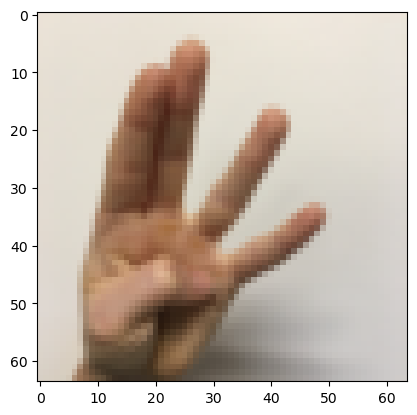

In [25]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [27]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


CONVOLUTION MODEL

In [29]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(4,4), strides=(1,1), padding='same')(input_img)
    # RELU
    A1 = tf.keras.layers.ReLU()(Z1)
    # MAXPOOL: window 8x8, stride=8, padding='SAME'
    P1 = tf.keras.layers.MaxPooling2D(pool_size=(8,8), strides=(8,8), padding='same')(A1)
    # CONV2D: 16 filters, 2x2 kernel, stride=1, padding='SAME'
    Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=(1,1), padding='same')(P1)
    # RELU
    A2 = tf.keras.layers.ReLU()(Z2)
    # MAXPOOL: window 4x4, stride=4, padding='SAME'
    P2 = tf.keras.layers.MaxPooling2D(pool_size=(4,4), strides=(4,4), padding='same')(A2)
    # FLATTEN
    F = tf.keras.layers.Flatten()(P2)
    # DENSE (output layer): 6 classes
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [30]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 8)      │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,310 (5.12 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

TRAIN THE MODEL

In [31]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1729 - loss: 1.8088 - val_accuracy: 0.1750 - val_loss: 1.7902
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1621 - loss: 1.7928 - val_accuracy: 0.1500 - val_loss: 1.7863
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1593 - loss: 1.7890 - val_accuracy: 0.1750 - val_loss: 1.7800
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1705 - loss: 1.7850 - val_accuracy: 0.2250 - val_loss: 1.7750
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2189 - loss: 1.7806 - val_accuracy: 0.3500 - val_loss: 1.7689
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2500 - loss: 1.7754 - val_accuracy: 0.3667 - val_loss: 1.7626
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2835 - loss: 1.7698 - val_accuracy: 0.3500 - val_loss: 1.7560
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2859 - loss: 1.7632 - val_accuracy: 0.4167 

HISTORY OBJECT

In [32]:
history.history

{'accuracy': [0.16388888657093048,
  0.15555556118488312,
  0.16851851344108582,
  0.2083333283662796,
  0.25648146867752075,
  0.2638888955116272,
  0.2935185134410858,
  0.3194444477558136,
  0.34259259700775146,
  0.35092592239379883,
  0.3879629671573639,
  0.39351850748062134,
  0.3879629671573639,
  0.41203704476356506,
  0.432407408952713,
  0.4407407343387604,
  0.4472222328186035,
  0.48148149251937866,
  0.4981481432914734,
  0.5148147940635681,
  0.5277777910232544,
  0.5462962985038757,
  0.5574073791503906,
  0.5740740895271301,
  0.5768518447875977,
  0.5981481671333313,
  0.614814817905426,
  0.6259258985519409,
  0.6416666507720947,
  0.6518518328666687,
  0.6537036895751953,
  0.6620370149612427,
  0.675000011920929,
  0.6814814805984497,
  0.6879629492759705,
  0.6953703761100769,
  0.7037037014961243,
  0.7175925970077515,
  0.729629635810852,
  0.7370370626449585,
  0.7379629611968994,
  0.7342592477798462,
  0.7388888597488403,
  0.7472222447395325,
  0.75370371341

C:\Users\yadav\AppData\Local\Temp\ipykernel_16280\973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\yadav\AppData\Local\Temp\ipykernel_16280\973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

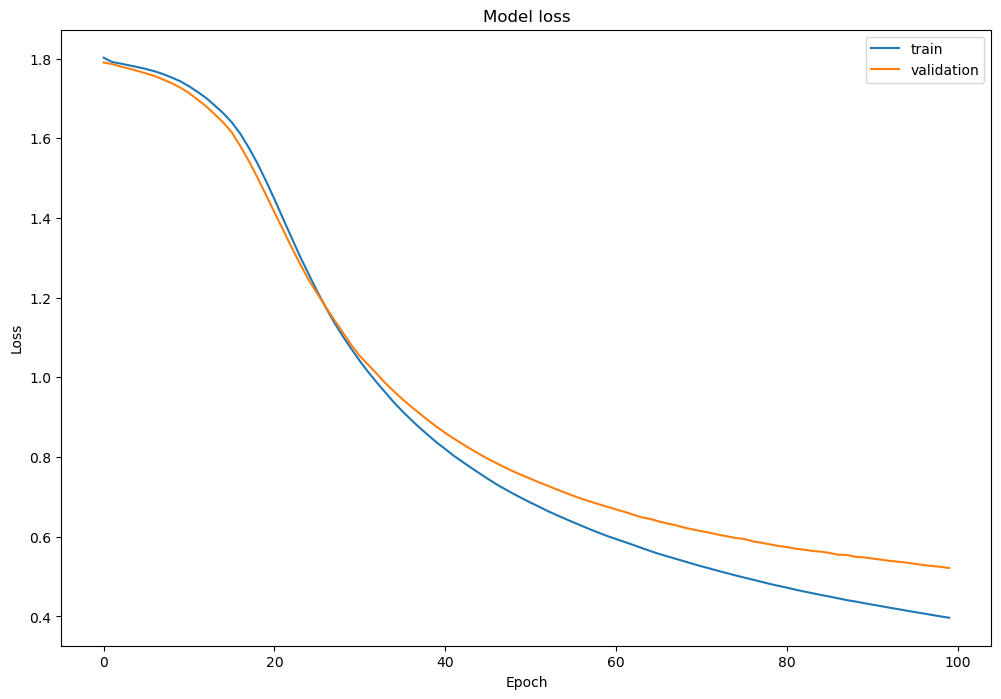

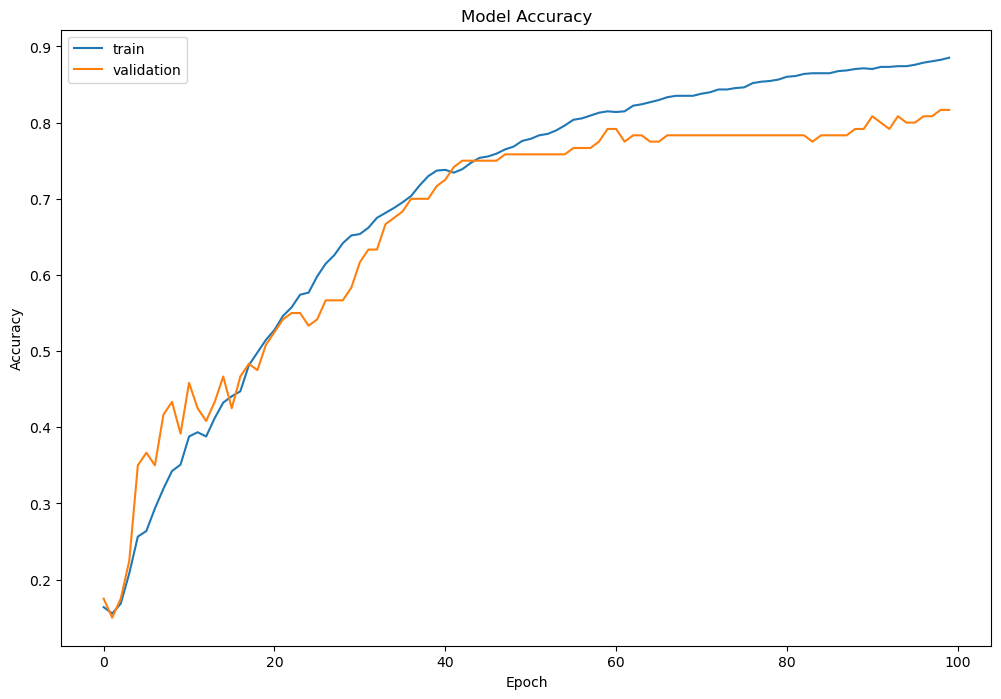

In [33]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')